<a href="https://colab.research.google.com/github/papillon00/Credit_card_segment/blob/main/Customer_Segmentation_analysis_Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze Credit Card Customer Segmentation

### Goal
--> to see which customer segment the credit card provider should focus on for retention efforts <BR>
* the attributes I want to focus on are as follows:
1. Credit limit value and relative utilization value - Monetary value they can spend (higher the better)
2. Month of inactive_12_mon - Recency (lower the better)
3. Frequency of transactions - Consistency of spending habits (Highter the better)


--> To analyze what kind of customers are more likely to discontinue w/ the card<BR>
* Attributes I want to explore:
1. Income level : explore if there's a relationship between income level and churn rate
2. Credit limit amount: explore if there's a relationship between low credit limit and churn rate
3. month of inactive_12_mon: assumes higher number indicate higher possibility of churning
4. Total_Relationship_Count: explore if >= 1 indicate less churn rate

### Dataset
Dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m/data)

I kept the below columns:

* CLIENTNUM: Unique identifier for each customer. (Integer)
* Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)
* Customer_Age: Age of customer. (Integer)
* Gender: Gender of customer. (String)
* Dependent_count: Number of dependents that customer has. (Integer)
* Education_Level: Education level of customer. (String)
* Marital_Status: Marital status of customer. (String)
* Income_Category: Income category of customer. (String)
* Months_on_book: How long customer has been on the books. (Integer) ->number of months that have passed since the customer's account was opened
* Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer)
* Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer)
* Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer)
* Credit_Limit: Credit limit of customer. (Integer)
* Total_Revolving_Bal: Total revolving balance of customer. (Integer)
* Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer) -> average amount of unused credit a customer has compared to their credit limit.
* Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer)
* Total_Trans_Amt: Total transaction amount. (Integer)
* Total_Trans_Ct: Total transaction count. (Integer)
* Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)
* Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer) -> amount of credit to total available credit limit cx use on average

### Clustering Techniques to Use

**1. RFM Anlaysis**
    
A marketing technique used to quantitatively rank and group customers based on their transaction history to identify the best customers and tailor marketing strategies accordingly. RFM stands for Recency, Frequency, and Monetary value, each corresponding to a key customer trait.

**2. K-Means Clustering:**

This is a popular unsupervised learning technique that groups data points into a predefined number of clusters based on their similarity.


## Import Libraries & Dataset

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import numpy as np
from google.colab import drive
import os
from posix import waitid_result
import zipfile
from scipy import stats

In [62]:
#set up Kaggle API
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!pip install kaggle

### Configure Kaggle setting in Colab

1.   Go to your Kaggle login page > **Settings**> **API** --> click "Create New Token", it will download the json file
2.   Move the json file to Google Drive> My Drive > Kaggle



In [64]:
#Set Kaggle Configuration
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
os.chdir('/content/drive/MyDrive/kaggle')
os.getcwd()

'/content/drive/MyDrive/kaggle'

In [65]:
# go to Kaggle dataset page and "copy API Command"
! kaggle datasets download -d thedevastator/predicting-credit-card-customer-attrition-with-m

predicting-credit-card-customer-attrition-with-m.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:

# Define the path to your zip file
file_path = '/content/drive/MyDrive/kaggle/predicting-credit-card-customer-attrition-with-m.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder

## Load Dataset

In [67]:
df2 = pd.read_csv('BankChurners.csv')

In [68]:
df2 = df2[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category','Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [69]:
print(f"There are {df2.shape[0]} data points and {df2.shape[1]} features")

There are 10127 data points and 20 features


## Exploring the columns in depth


Based on the statistical data below, it appears that there's no outliers for the above key columns

In [70]:
df2.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


I want to focus on the below **3 features**:
- Credit limit value and relative utilization value - Monetary value they can spend (higher unspent credit limit the better)

To credit card companies, customers who spend below their credit limit have a lower risk of delinquency and tend to be more profitable to retain as they most likely will continue paying interest and annual fees.

- Month of inactive_12_mon - Recency (lower the better)
- No. of dependents - Consistency of spending habits as they have less responsibility (lower the better)

## Data Cleaning

In [71]:
df_nonnull_ID = df2[df2['CLIENTNUM'].notnull()]
df_nonnull_credit_limit = df2[df2['Credit_Limit'].notnull()]

print (f"Out of {df2.shape[0]} records, there are {df_nonnull_ID.shape[0]} non-null CLIENTNUM records.")
print (f"Out of {df2.shape[0]} records, there are {df_nonnull_credit_limit.shape[0]} non-null credit limit records.")

Out of 10127 records, there are 10127 non-null CLIENTNUM records.
Out of 10127 records, there are 10127 non-null credit limit records.


### Checking for unknown values


I noticed one key col "Income_Category", there is 'Unknown' mix in there.<BR>
I want to explore how many unknown cx there are and what's the impact if I choose to ignore it/filter it out<BR>

I can either: <BR>
* remove the rows with 'Unknown' or
* default all of them to 'Less than $40K' category
* Not use "Income Category" in my customer segmentation analysis



In [72]:

df2.groupby('Income_Category').size().reset_index(name='counts')

#data cleaning

total_count = df2.shape[0]
df2['pct_of_total'] = df2.groupby('Income_Category')['Income_Category'].transform('size') / total_count * 100
df2.groupby('Income_Category')['pct_of_total'].mean().round(2)


Income_Category
$120K +            7.18
$40K - $60K       17.68
$60K - $80K       13.84
$80K - $120K      15.16
Less than $40K    35.16
Unknown           10.98
Name: pct_of_total, dtype: float64


As I already decided to use credit room ($ amount of available credit to use) as part of my segement analysis, I can ignore Income_category as it is not a significant factor in my analysis.

The assumption is that credit limit was granted based on income level provided by the applicant.

In [73]:
# Credit available to be used
df2['credit_room'] = df2['Credit_Limit'] * (1 - df2['Avg_Utilization_Ratio'])


### Check for Outliers

A visually easy way to check for outliers in numerical columns is by using **boxplots**. Boxplots can show the median, quartiles, and any points that fall outside of the whiskers, which can be potential outliers.

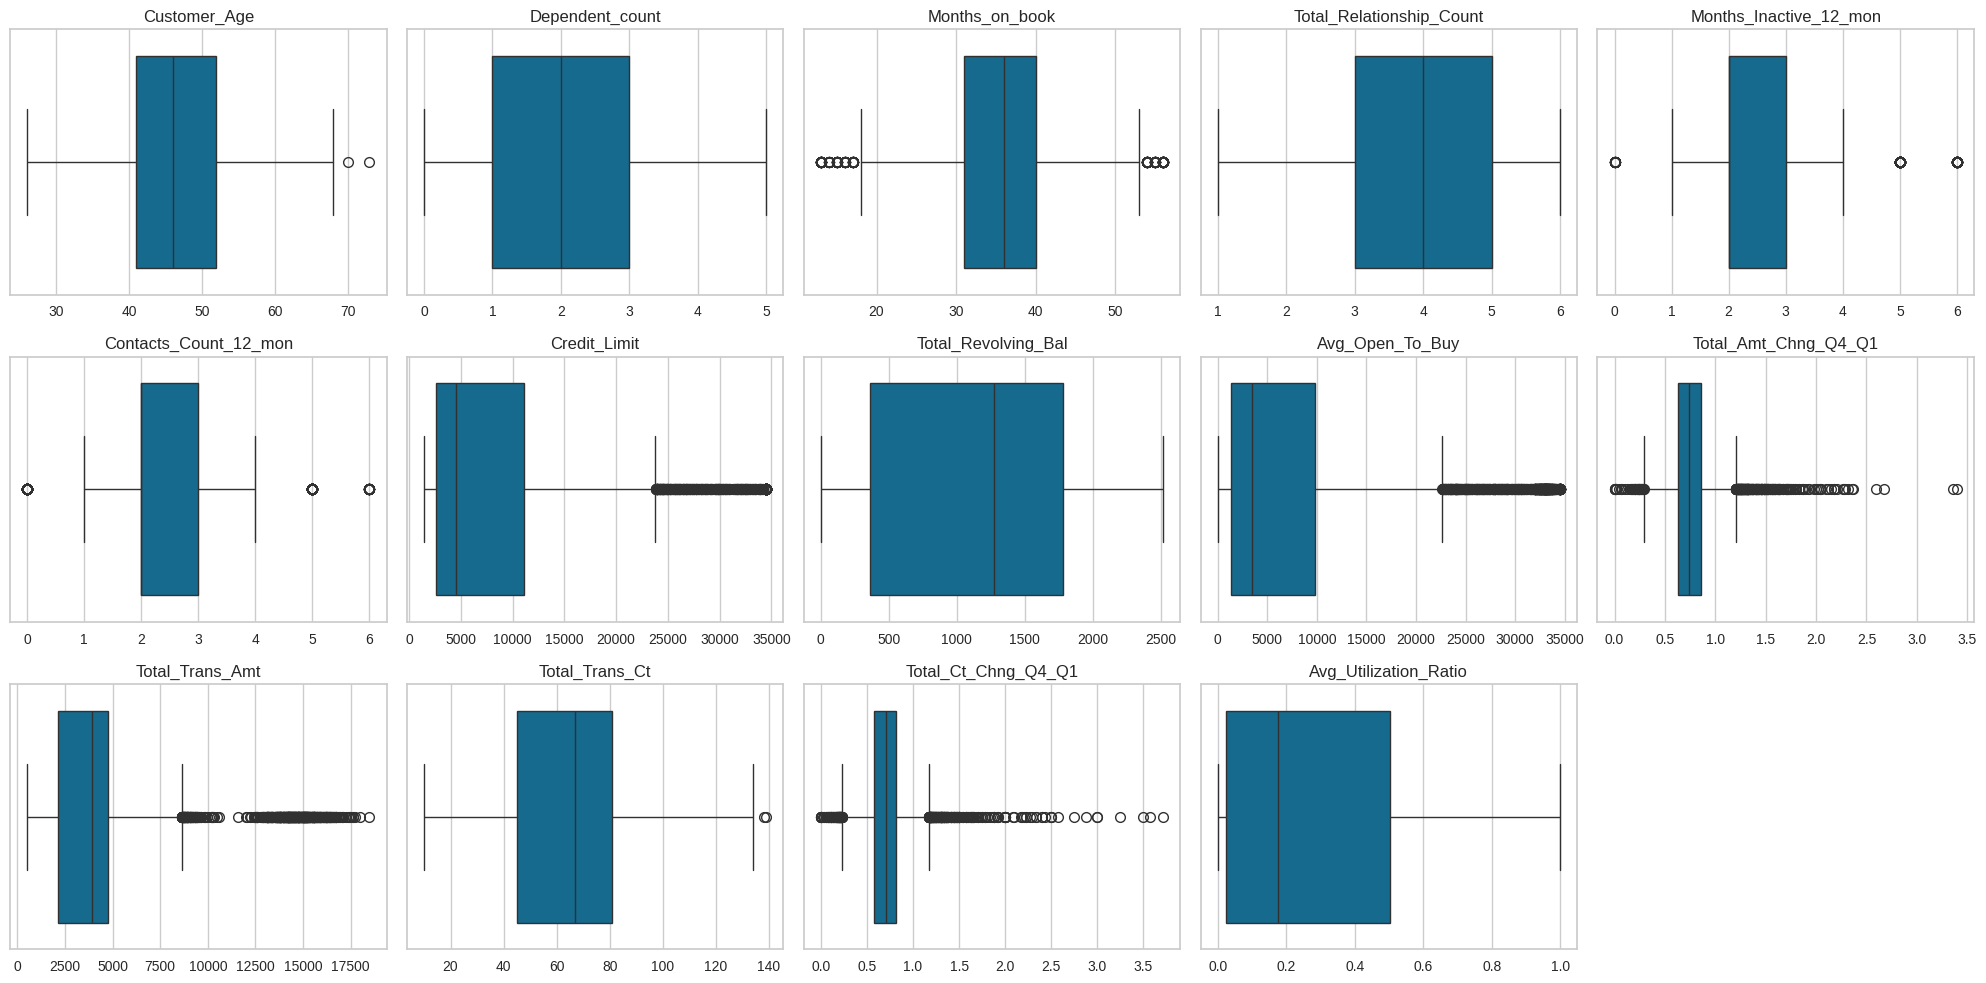

In [74]:
numeric_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

plt.figure(figsize=(20, 10))
for index, column in enumerate(numeric_columns):
    plt.subplot(3, 5, index+1)
    sns.boxplot(x=df2[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Summary of Analysis:** Based on the number of outliers and the extent to which they diverge from the rest of the data, Credit Limit and Avg_Open_To_Buy contain the most outliers and may produce erroneous outputs if used without addressing these outliers. Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, and Total_Trans_Ct also have a significant number of outliers and should be examined carefully. The remaining variables appear to have fewer outliers and might not be as prone to causing errors due to outlier values.

In [75]:
# Calculate the Z-score for each column and count the number of outliers (abs(z) > 3)
# Dictionary to hold count of outliers for each column
outlier_counts = {}

for column in numeric_columns:
    z_scores = stats.zscore(df2[column])
    outliers = np.where(np.abs(z_scores) > 3)[0]
    outlier_counts[column] = len(outliers)

outlier_counts

{'Customer_Age': 1,
 'Dependent_count': 0,
 'Months_on_book': 0,
 'Total_Relationship_Count': 0,
 'Months_Inactive_12_mon': 124,
 'Contacts_Count_12_mon': 54,
 'Credit_Limit': 0,
 'Total_Revolving_Bal': 0,
 'Avg_Open_To_Buy': 0,
 'Total_Amt_Chng_Q4_Q1': 163,
 'Total_Trans_Amt': 391,
 'Total_Trans_Ct': 2,
 'Total_Ct_Chng_Q4_Q1': 113,
 'Avg_Utilization_Ratio': 0}

We can see that there's significant outliers found in Month_Inactive_12_mon, Total_Trans_Amt and Total_Amt_Chng_Q4_Q1

In [76]:

# Calculate Z-scores of all numerical columns
z_scores = np.abs(stats.zscore(df2[numeric_columns]))

# Set a threshold for identifying an outlier
threshold = 3

# Get boolean mask where any row has a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Select rows that do not contain any outliers
df_no_outliers = df2[~outliers]

print(f"there are {df2[outliers].shape[0]} out of {df2.shape[0]} rows that contain outliers")

there are 814 out of 10127 rows that contain outliers


Based on my goal of anlayzing customers for retention purpose, I need to decide whether to remove outliers or keep them.
Here's the thought proces of my decision:
*   Credit Limit and Utilization: High credit limit and utilization are valuable for the analysis since they represent the monetary value customers can spend. Outliers here may represent the top customers who are very valuable to retain.

*   Months of Inactivity: Outliers may indicate customers who are at risk of churning. It's important to keep these data points, as they are crucial to the analysis.

*   Frequency of Transactions: High-frequency outliers are the most active customers. Removing these could lead to losing insight into your best customers' behaviors.

**Decision:** For the purpose of trying to identify High Potential customers, outliers can be kept after it has been validated for data accuracy (no input error). In addition, since I am cross-examining the customer group based on 3 variables, not just one, it mitigates the effect of distortion from 1 variable (i.e. Month of Inactivity)



## Exploring the Data Visually

### Creating 5 categories for Age Range

In [77]:
df_credit_room_age = df2.groupby(['Customer_Age'])['credit_room'].mean().reset_index()
df_balance = df2.groupby(['Customer_Age'])['Total_Revolving_Bal'].mean().reset_index()
df_months_inactive = df2.groupby(['Customer_Age'])['Months_Inactive_12_mon'].mean().reset_index()

num_bins = 5
min_value = df_credit_room_age['Customer_Age'].min()
max_value = df_credit_room_age['Customer_Age'].max()
bin_width = (max_value - min_value) / num_bins
bins = pd.cut(df_credit_room_age.Customer_Age, bins=num_bins, labels=range(1, num_bins+1))



In [78]:
df_credit_room_age = pd.concat([df_credit_room_age, bins], axis=1)
df_credit_room_age.columns = ['Customer_Age', 'credit_room', 'Age_bins']

In [79]:
df_credit_room_age2 = df_credit_room_age.copy()

for i in range(len(df_credit_room_age)):
    mask= df_credit_room_age.loc[i,'Age_bins']
    min_age = df_credit_room_age['Customer_Age'].loc[df_credit_room_age['Age_bins'] == mask].min()
    max_age = df_credit_room_age['Customer_Age'].loc[df_credit_room_age['Age_bins'] == mask].max()
    age_range = str(min_age) + ' - ' + str(max_age)
    df_credit_room_age.loc[i,'Age_Range'] = age_range
# min_age = df_credit_room_age['Customer_Age'].loc[df_credit_room_age['Age_bins'] == 1].min()
# max_age = df_credit_room_age['Customer_Age'].loc[df_credit_room_age['Age_bins'] == 1].max()
# age_range = str(min_age) + ' - ' + str(max_age)

# age_range

According to graph above, customers aged between 36-44 and 45-54 have the highest credit limit, which indicates room for more spending to occur.

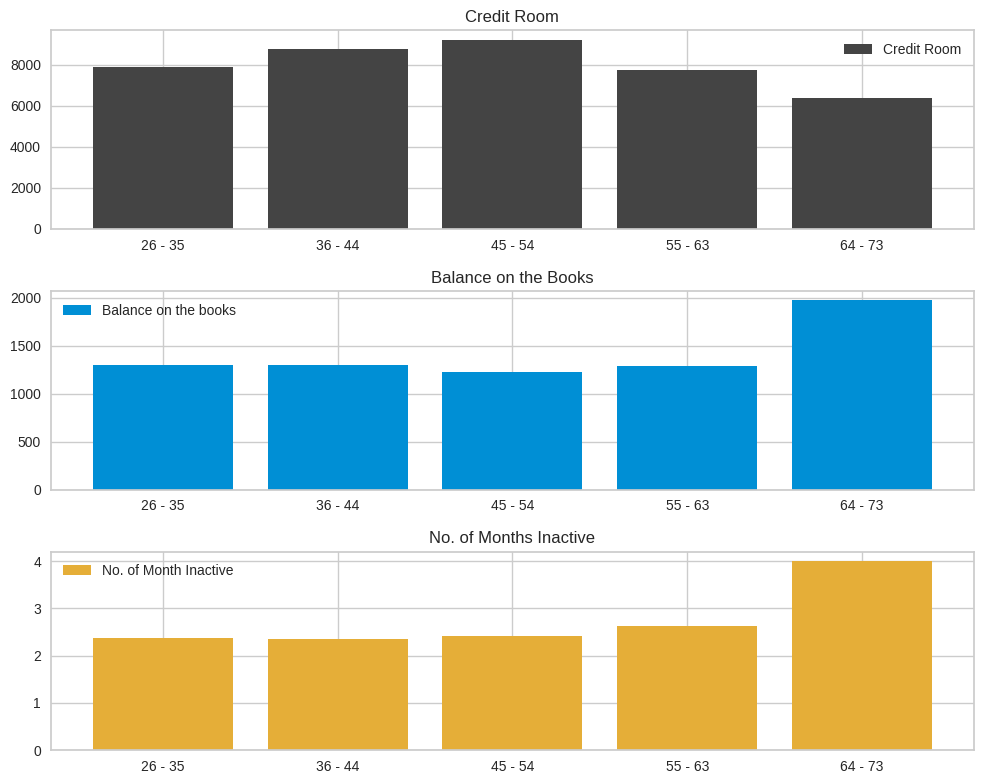

In [80]:
# Assuming your code has already created the DataFrames:
# df_credit_room_age, df_balance, df_months_inactive

# Create a figure with subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Adjust figsize for desired dimensions

# Plot data on each subplot
axs[0].bar(df_credit_room_age['Age_Range'], df_credit_room_age['credit_room'], color="#444444", label='Credit Room')
axs[0].set_title('Credit Room')
axs[0].legend()

axs[1].bar(df_credit_room_age['Age_Range'], df_balance['Total_Revolving_Bal'], color="#008fd5", label='Balance on the books')
axs[1].set_title('Balance on the Books')
axs[1].legend()

axs[2].bar(df_credit_room_age['Age_Range'], df_months_inactive['Months_Inactive_12_mon'], color="#e5ae38", label='No. of Month Inactive')
axs[2].set_title('No. of Months Inactive')
axs[2].legend()

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()


When looking at No. of Inactive Months and Balance on the books, it appears that customers age 64-73 have higher inacitve months and higher balance, pointing to potential risk of missing payments andy also higher chance of churning out.

### Explore Dependencies Between No. of Dependents & Credit Limit

In [81]:
df_dependency = df2.groupby('Dependent_count')[['Credit_Limit', 'Total_Revolving_Bal', 'Months_Inactive_12_mon']].mean().reset_index()
#df_dependency = df2.groupby('Dependent_count')['Credit_Limit'].mean().reset_index()

In [82]:
df_dependency

,Dependent_count,Credit_Limit,Total_Revolving_Bal,Months_Inactive_12_mon
0,0,7160.763717,1146.824115,2.332965
1,1,7905.123449,1199.165397,2.372144
2,2,8717.175292,1150.825612,2.332957
3,3,8976.506589,1149.539531,2.345900
4,4,9454.955019,1163.992376,2.336086
5,5,9110.453302,1195.554245,2.264151


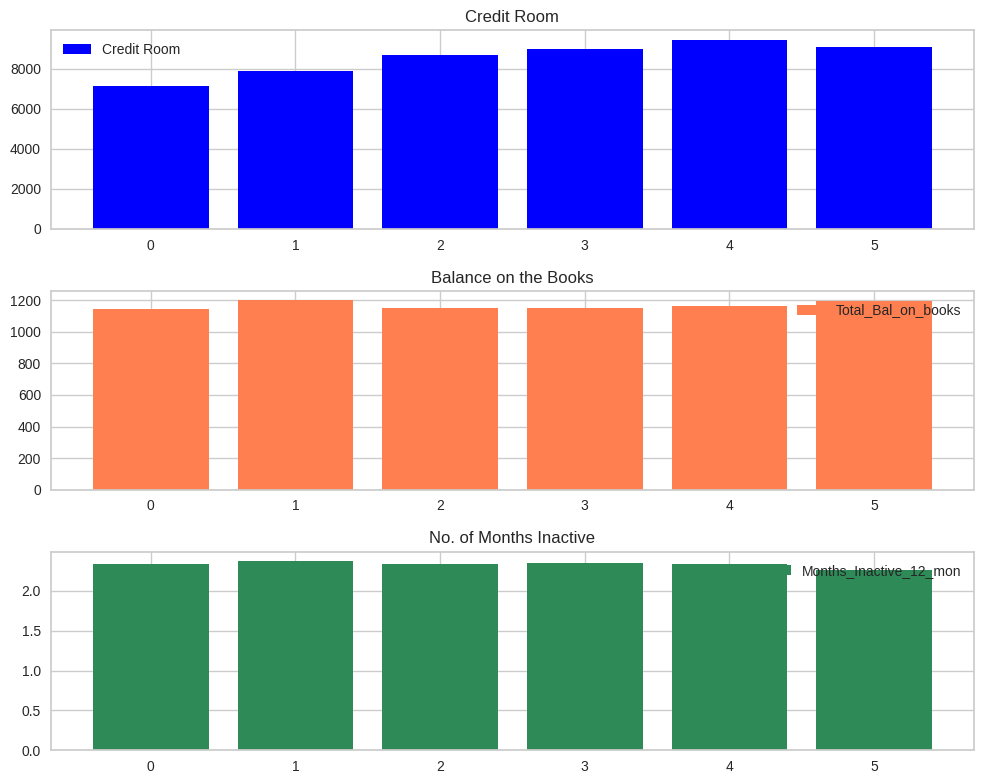

In [83]:

# Create a figure with subplots (3 rows, 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Adjust figsize for desired dimensions

# Plot data on each subplot
axs[0].bar(df_dependency['Dependent_count'], df_dependency['Credit_Limit'], color="blue", label ='Credit Room' )
axs[0].set_title('Credit Room')
axs[0].legend()

axs[1].bar(df_dependency['Dependent_count'], df_dependency['Total_Revolving_Bal'], color="coral", label ='Total_Bal_on_books' )
axs[1].set_title('Balance on the Books')
axs[1].legend()

axs[2].bar(df_dependency['Dependent_count'], df_dependency['Months_Inactive_12_mon'], color="seagreen", label ='Months_Inactive_12_mon' )
axs[2].set_title('No. of Months Inactive')
axs[2].legend()

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

Interestingly, the data shows customer with higher number of dependents also have higher credit limit room for growth. When looking at average balance and Average inactive month, there were no significant diffrences among different dependent groups.

Based on the above exploration, I decided to go with Age instead of dependents as part of my segment criteria.

I want to see if there is a relationship between the **'Total_Relationship_Count' & 'Months_on_book'**

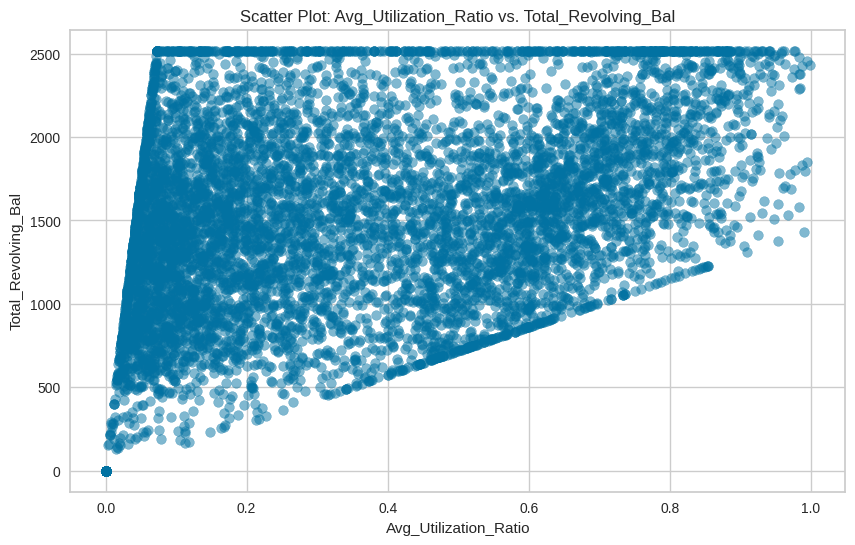

In [84]:
x_name = 'Avg_Utilization_Ratio'
y_name = 'Total_Revolving_Bal'

x = df2[x_name]
y = df2[y_name]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(x, y, alpha=0.5)  # alpha controls the transparency of the points

# Set plot labels and title
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f"Scatter Plot: {x_name} vs. {y_name}")

# Show the plot
plt.show()

The above scatter plot is visualizing the relationship between average utilization ratio and total revolving balance. I want to explore whether customers with higher average utilization ratios may have higher revolving balances. Based on the above plot, there's no significant relationship between the two variables.



### Correlation Heap Map

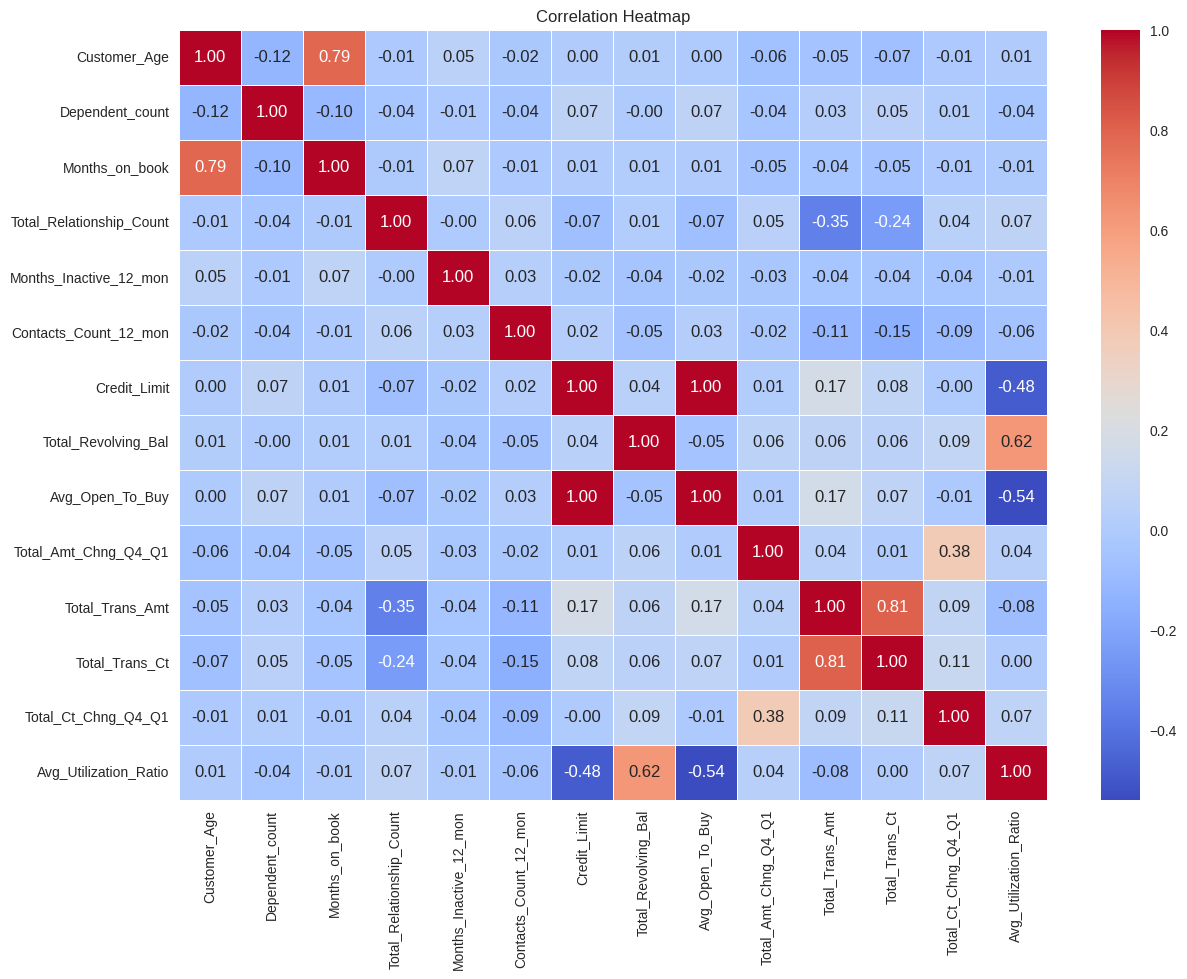

In [85]:
# Select relevant numeric columns for correlation analysis
numeric_columns = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

# Create a correlation matrix
correlation_matrix = df2[numeric_columns].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) #fmt is number format .2f = 2 decimal pts

plt.title('Correlation Heatmap')
plt.show()

I find correlation heatmap a great way to explore correlation coefficients with all the numeric values presented in a dataset. The coefficients range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Colors often assist in interpreting the heatmap, with red shades representing positive correlations, blue shades indicating negative correlations, and the intensity of the color corresponding to the strength of the relationship.

According to above heatmap, the following variable presents correlation between each other:



*   "Customer_Age" and "Months_on_book" are strongly positively correlated (0.79), suggesting that as customer age increases, the length of time they have been on the books also increases.
*   "Total_Trans_Ct" and "Total_Trans_Amt" have a very strong positive correlation (0.81), indicating that as the number of transactions increases, the total amount of transactions also tends to increase.

*   "Avg_Utilization_Ratio" has a moderate negative correlation with "Credit_Limit" (-0.48) and "Avg_Open_To_Buy" (-0.54), which could imply that customers with higher credit limits or more available credit tend to utilize a smaller proportion of their credit line.

*   "Total_Revolving_Bal" has a strong positive correlation with "Avg_Utilization_Ratio" (0.62), meaning that customers with higher revolving balances typically have a higher utilization ratio.




### Violin Plot
**Categories to explore:** Gender, Age, Income Status, Education Level & Marital Status›


In [86]:
num_bins = 5
min_value = df2['Customer_Age'].min()
max_value = df2['Customer_Age'].max()
bin_width = (max_value - min_value) / num_bins
bins = pd.cut(df2.Customer_Age, bins=num_bins, labels=range(1, num_bins+1))

In [87]:
df2 = pd.concat([df2, bins], axis=1)

In [89]:
df2.columns = ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'pct_of_total', 'credit_room', 'Age_bins']

In [90]:

for i in range(len(df2)):
    mask= df2.loc[i,'Age_bins']
    min_age = df2['Customer_Age'].loc[df2['Age_bins'] == mask].min()
    max_age = df2['Customer_Age'].loc[df2['Age_bins'] == mask].max()
    age_range = str(min_age) + ' - ' + str(max_age)
    df2.loc[i,'Age_Range'] = age_range

In [91]:
# Check for NaN values in the 'Age_Range' column
nan_values = df2['Age_Range'].isnull().sum()

print("Number of NaN values in 'Age_Range' column:", nan_values)


Number of NaN values in 'Age_Range' column: 0


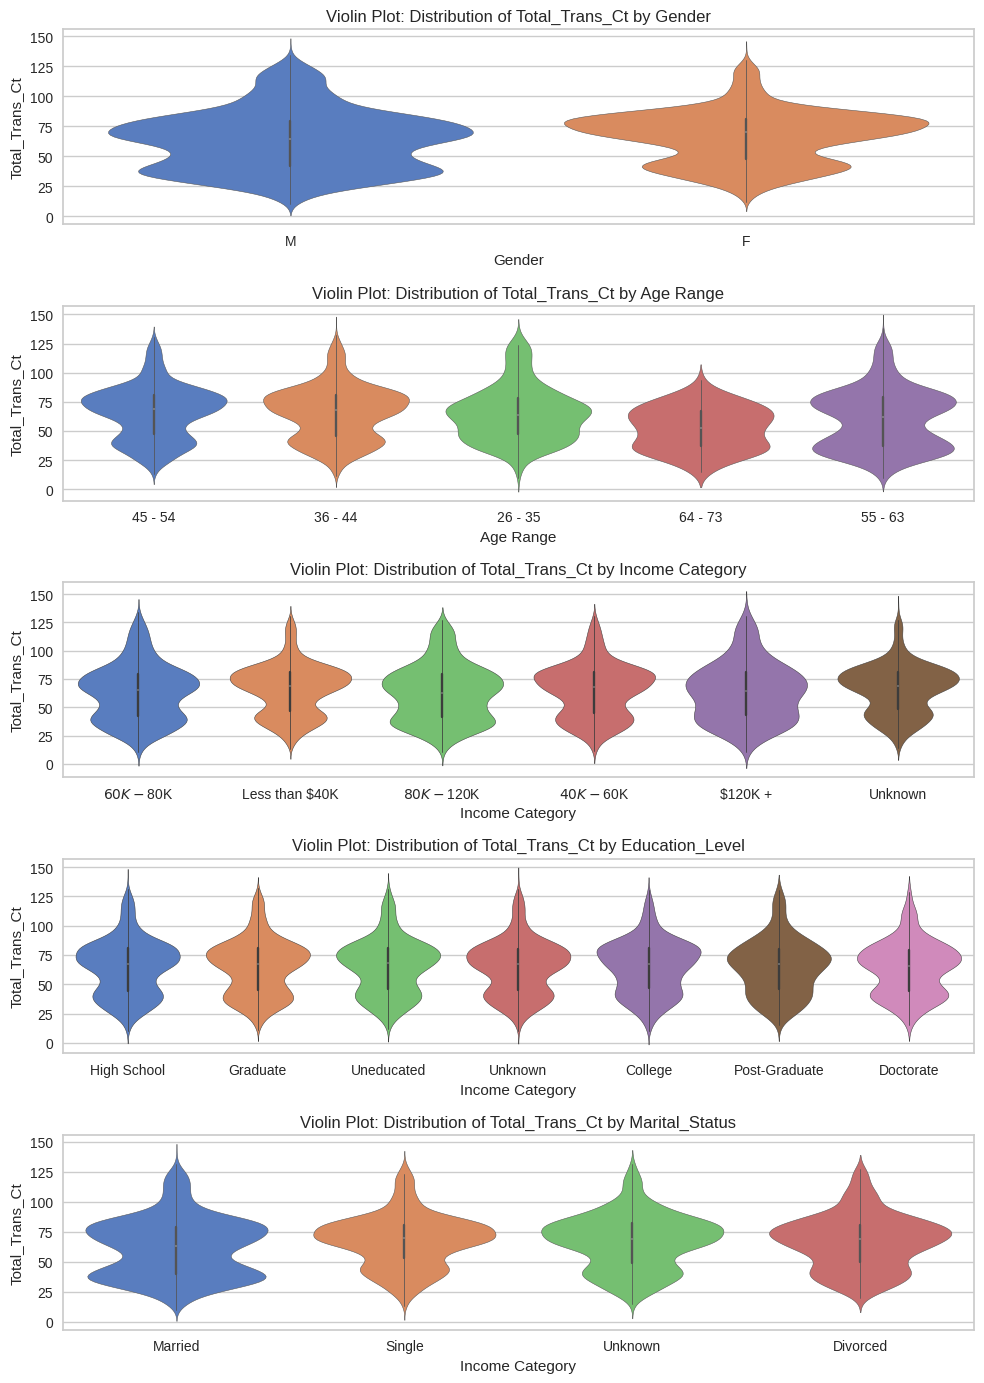

In [92]:
# change y_name to whatever numerical variable you want to explore
y_name = 'Total_Trans_Ct'

fig, axs = plt.subplots(5, 1, figsize=(10, 14))  # Adjust figsize for desired dimensions

# Plot data on each subplot
sns.violinplot(x='Gender', y=y_name, data=df2, palette='muted', hue='Gender', ax=axs[0], split=False).legend().remove()
axs[0].set_title(f"Violin Plot: Distribution of {y_name} by Gender")
axs[0].set_xlabel('Gender')
axs[0].set_ylabel(y_name)

sns.violinplot(x='Age_Range', y=y_name, data=df2, palette='muted', hue='Age_Range', ax=axs[1], split=False).legend().remove()
axs[1].set_title(f"Violin Plot: Distribution of {y_name} by Age Range")
axs[1].set_xlabel('Age Range')
axs[1].set_ylabel(y_name)

sns.violinplot(x='Income_Category', y=y_name, data=df2, palette='muted', hue='Income_Category', ax=axs[2], split=False).legend().remove()
axs[2].set_title(f"Violin Plot: Distribution of {y_name} by Income Category")
axs[2].set_xlabel('Income Category')
axs[2].set_ylabel(y_name)

sns.violinplot(x='Education_Level', y=y_name, data=df2, palette='muted', hue='Education_Level', ax=axs[3], split=False).legend().remove()
axs[3].set_title(f"Violin Plot: Distribution of {y_name} by Education_Level")
axs[3].set_xlabel('Income Category')
axs[3].set_ylabel(y_name)

sns.violinplot(x='Marital_Status', y=y_name, data=df2, palette='muted', hue='Marital_Status', ax=axs[4], split=False).legend().remove()
axs[4].set_title(f"Violin Plot: Distribution of {y_name} by Marital_Status")
axs[4].set_xlabel('Income Category')
axs[4].set_ylabel(y_name)

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()


**Gender:** The first plot shows the distribution of Total_Trans_Ct by gender. Both distributions have similar shapes, but the distribution for females (F) is slightly wider than that for males (M), suggesting a broader range of transaction counts for females.

**Age Range:** The second plot shows shapes vary across age groups, with the 26-35 age range showing a particularly narrow distribution, indicating less variability in transaction counts. Older age groups, such as 64-73, have a broader distribution, suggesting more variability.

**Income Category:** The third plot also hows shapes are quite varied here, with the $80K–$120K income range having a noticeably narrower distribution compared to other categories, which indicates less variability in transaction counts within this income group.

**Education Level: **The last plot shows that the the distributions are quite similar in shape, with the "Uneducated" group has a slightly different, narrower distribution, and the "Post-Graduate" group has a broader distribution indicating more variability in transaction counts.

**Summary of Analysis:** The violin plots suggest that while there are differences in the distribution of transaction counts across different demographic groups (gender, age, income, education), there isn't a single group that stands out with extremely different behavior. However, certain trends are visible such as a broader range of transactions among females, higher income categories, and those with postgraduate education. This implies that these groups might engage in a wider variety of transaction activities.




## Create Segment by using a RFM Analysis (Recency, Frequency, Monetary Value):

A RFM Analysis will provide insights to the followings:
1. who are the top customers that the company should try to retain?
2. which customers have the potential to increase credit usage?
3. which customers are likely to churn?


In [93]:

print(f"there are {df2.loc[df2.Attrition_Flag == 'Attrited Customer'].shape[0]} attrited customers out of {df2.shape[0]} in the dataset")

there are 1627 attrited customers out of 10127 in the dataset


### Focus on Existing Customers from the Dataset

Since we want to focus our analysis on the existing customers, it makes sense to remove the attrited customers from the dataset.

In [94]:
df3 = df2.loc[df2.Attrition_Flag != 'Attrited Customer']

### Customer Segmentation based on Available Credit Room vs Approved Credit Limit

There are two approaches that can be applied:
1) Focusing on avaialble credit room allows you to identify active users, guage their financial behavior and tailor strategies to encourage more usage
2) Focusing on Approved Credit limit allows you to identify customer groups that can upsell other financial products (growth)

As the goal is to retain existing clients and prevent attrition, credit room is a more dynamic indicator as low utilization may indicate clients with more prudent spending behavior or lower spending needs which may lead to attrition.

### Recency
Number of days since last usage. "No. of Inactive Months" will be referenced (1 being high no. of inactive months, 4 being <1 inacitve month)

In [95]:
df3['Recency'] = df3['Months_Inactive_12_mon']

<ipython-input-95-8b14372db840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Recency'] = df3['Months_Inactive_12_mon']


### Frequency
Frequency of transactions being charged to the credit card , 4 being high and 1 being low count (Total_Trans_Ct )

In [96]:
df3['Frequency'] = df3['Total_Trans_Ct']

<ipython-input-96-c8cc5cc5dbd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Frequency'] = df3['Total_Trans_Ct']


### Monetary Value
Potential profitability per customer. We will examine avaible credit per customer (1 being low credit room, 4 being high credit room)

In [97]:
df3['Monetary'] = df3['credit_room']

<ipython-input-97-ead0872fb536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Monetary'] = df3['credit_room']


In [98]:
df3.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,pct_of_total,credit_room,Age_bins,Age_Range,Recency,Frequency,Monetary
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,39,5,...,42,1.625,0.061,13.844179,11916.849,3,45 - 54,1,42,11916.849
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,44,6,...,33,3.714,0.105,35.163425,7389.120,3,45 - 54,1,33,7389.120
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,36,4,...,20,2.333,0.000,15.157500,3418.000,3,45 - 54,1,20,3418.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,34,3,...,20,2.333,0.760,35.163425,795.120,2,36 - 44,4,20,795.120
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,21,5,...,28,2.500,0.000,13.844179,4716.000,2,36 - 44,1,28,4716.000


### Calculating RFM Scoring

In [99]:
df3['R'] = pd.qcut(df3['Months_Inactive_12_mon'], q=4, labels=[4, 3, 2, 1])
df3['F'] = pd.qcut(df3['Total_Trans_Ct'], q=4, labels=[1, 2, 3, 4])
df3['M'] = pd.qcut(df3['credit_room'], q=4, labels=[1, 2, 3, 4])


<ipython-input-99-933c19e22162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['R'] = pd.qcut(df3['Months_Inactive_12_mon'], q=4, labels=[4, 3, 2, 1])
<ipython-input-99-933c19e22162>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['F'] = pd.qcut(df3['Total_Trans_Ct'], q=4, labels=[1, 2, 3, 4])
<ipython-input-99-933c19e22162>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [100]:
df3['RFM_score'] = df3['R'].astype(str)+df3['F'].astype(str)+df3['M'].astype(str)

<ipython-input-100-1db204e3c462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['RFM_score'] = df3['R'].astype(str)+df3['F'].astype(str)+df3['M'].astype(str)


In [101]:
print(f"Recency score of 4 ranges from {df3['Months_Inactive_12_mon'].loc[df3.R == 4].min()} to {df3['Months_Inactive_12_mon'].loc[df3.R == 4].max()} months of inactivity")
print(f"Frequency score of 4 ranges from {df3['Total_Trans_Ct'].loc[df3.F == 4].min()} to {df3['Total_Trans_Ct'].loc[df3.F == 4].max()} number of transactions")
print(f"Monetary score of 4 ranges from {format(df3['Monetary'].loc[df3.M == 4].min(), '.0f')} to {format(df3['Monetary'].loc[df3.M == 4].max(), '.0f')} in available credit")

print(f"Recency score of 3 ranges from {df3['Months_Inactive_12_mon'].loc[df3.R == 3].min()} to {df3['Months_Inactive_12_mon'].loc[df3.R == 3].max()} months of inactivity")
print(f"Frequency score of 3 ranges from {df3['Total_Trans_Ct'].loc[df3.F == 3].min()} to {df3['Total_Trans_Ct'].loc[df3.F == 3].max()} number of transactions")

print(f"Monetary score of 3 ranges from {format(df3['Monetary'].loc[df3.M == 3].min(), '.0f')} to {format(df3['Monetary'].loc[df3.M == 3].max(), '.0f')} in available credit")


Recency score of 4 ranges from 0 to 1 months of inactivity
Frequency score of 4 ranges from 83 to 139 number of transactions
Monetary score of 4 ranges from 9980 to 34516 in available credit
Recency score of 3 ranges from 2 to 2 months of inactivity
Frequency score of 3 ranges from 72 to 82 number of transactions
Monetary score of 3 ranges from 3470 to 9978 in available credit


### Assigning the different RFM scores to groups

Here are the main categories we want to explore:

- **441, 342** - Loyal Customers - Moderate to high utilization of available credit, very low number of inactive months, and very high frequency of transactions<BR>
- **44x, 43x, 33x, 34x** - High Potential Customers - Low to moderate utilization of available credit, low number of inactive months, and high frequency of transactions<BR>
- **411, 412, 421, 422, 431, 432** - Recent Customers - Client who is very active with varying frequency and utilisation<BR>
- **xx4, xx3** - Prudent Savers - Client who is active and with varying purchase frequency but has low utilization of credit (more credit room)<BR>
- **11x, 12x, 21x** - High Risk of Churning Customers - Long period of inactivity,low counts of transaction and varying utilisation of credit<BR>
- **xx1** - Maxed Out Customers - client who has low available credit with varying frequency of transactions, this might indicate financial stress or credit dependency<BR>
- **Others** - Clients that do not fall into any of the above category


In [102]:
def map_rfm_category(rfm_score):
    # Loyal Customers
    if rfm_score in[ '441', '442', '341','342']:
        return 'Loyal Customers'
    # High Potential Customers
    elif rfm_score[:2] in ['44', '33', '43', '34']:
        return 'High Potential Customers'
    # Recent Customers
    elif rfm_score in['411', '412', '421','422','431','432']:
        return 'Recent Customers'
    # At-Risk Customers
    elif rfm_score[:2] in ['11', '12', '21']:
        return 'High Risk of Churning Customers'
    # Maxed Out Customers - assuming '1' in the Monetary value indicates maxed out or high credit utilization
    elif rfm_score[2] == '1':
        return 'Maxed Out Customers'
    # Prudent Savers
    elif rfm_score[2] in ['4', '3']:
        return 'Prudent Savers'
    else:
        return 'Other Customers'

# Apply the function to your DataFrame
df3['Customer_Segment'] = df3['RFM_score'].apply(map_rfm_category)


<ipython-input-102-5b9baa51d84a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Customer_Segment'] = df3['RFM_score'].apply(map_rfm_category)


In [103]:

# Calculate the count of each customer segment
segment_counts = df3['Customer_Segment'].value_counts()

# Calculate the percentage of the total for each customer segment
segment_percentages = df3['Customer_Segment'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages
segment_summary = pd.DataFrame({
    'Count': segment_counts,
    'Percentage of Total (%)': segment_percentages
}).reset_index()

# Rename 'index' column to 'Customer Segment'
segment_summary.rename(columns={'index': 'Customer Segment'}, inplace=True)

# Display the table
print(segment_summary)


                  Customer Segment  Count  Percentage of Total (%)
0                   Prudent Savers   2554                30.047059
1         High Potential Customers   1816                21.364706
2  High Risk of Churning Customers   1032                12.141176
3              Maxed Out Customers    996                11.717647
4                  Other Customers    981                11.541176
5                  Loyal Customers    578                 6.800000
6                 Recent Customers    543                 6.388235


### Results Breakdown
The distribution suggests a healthy base of **Prudent Savers** at 30.05% and **High Potential Customers** at 21.36%, indicating opportunities for up-selling and cross-selling with the right incentives.
The **High Risk of Churning** at 12.14% and **Maxed Out Customers** at 11.71% segments highlight areas where targeted interventions can prevent loss and potentially improve financial health, respectively.

### Prudent Savers
- **Count:** 2554
- **Percentage:** 30.05%
- **Insight:** This is the largest segment, indicating a significant portion of customers are active with low credit utilization. They may prefer saving or are cautious with their spending.
- **Recommended Strategy:** Offer products that reward saving and prudent spending. Financial advice or products with savings incentives might appeal to this group.

### High Potential Customers
- **Count:** 1816
- **Percentage:** 21.36%
- **Insight:** A substantial segment with low to moderate credit utilization and recent activity. These customers show promise for increased engagement.
- **Recommended Strategy:** Engage with personalized offers to encourage higher spending. Loyalty programs or benefits that incentivize increased credit use could convert them into Loyal Customers.

### High Risk of Churning Customers
- **Count:** 1032
- **Percentage:** 12.14%
- **Insight:** Customers at risk of churning due to inactivity and low transactions. A critical segment from a retention perspective.
- **Recommended Strategy:** Implement targeted re-engagement campaigns. Understand their needs through feedback and offer tailored incentives to reignite interest.

### Maxed Out Customers
- **Count:** 996
- **Percentage:** 11.72%
- **Insight:** Customers with high credit utilization, potentially indicating financial stress or reliance on credit.
- **Recommended Strategy:** Look into their credit limit and payment history, for customers with good rating, offer to increase their limit. For those who are struggling to pay off balance, offer programs that can provide some financial guidance.

### Loyal Customers
- **Count:** 578
- **Percentage:** 6.8%
- **Insight:** Though smaller in size, these customers are highly engaged, with recent activity and high transactions. They represent a valuable asset to the business.
- **Recommended Strategy:** Focus on retention and reward their loyalty. Upsell and cross-sell strategies should be employed to maximize value exchange.

### Recent Customers
- **Count:** 543
- **Percentage:** 6.39%
- **Insight:** The smallest segment, representing newer or less frequent customers. Their future behavior and segment migration are uncertain.
- **Recommended Strategy:** Welcome programs and introductory offers could enhance their experience and encourage more frequent engagement.


**DISCLAIMER:** some customers may fall into 1 or more customer group. It is recommended to further analyze the customers in this segment and potentially break down the groups into even more specific categories or segments.



## Visualizing the RFM Customer Segments

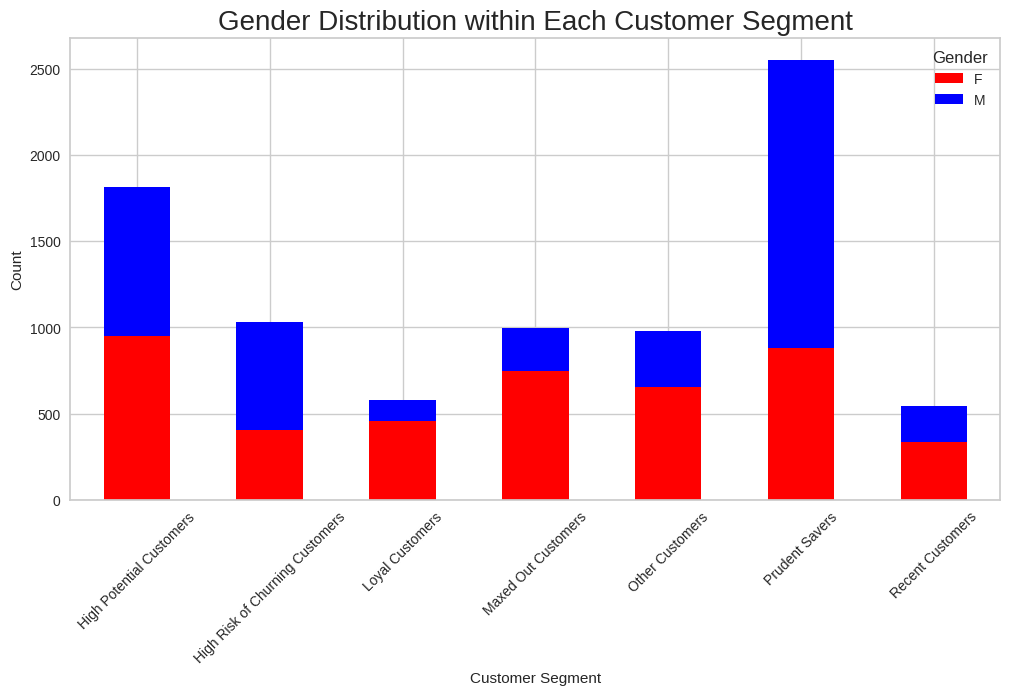

In [104]:
gender_dist = df3.groupby(['Customer_Segment', 'Gender']).size().unstack()
colors = ['red', 'blue']
gender_dist.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors )
plt.title('Gender Distribution within Each Customer Segment', size=20)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The stacked bar chart provides a clear comparison of gender distribution within each customer segment. Notably, it reveals a higher number of male customers in the **Prudent Savers** category compared to females. This might suggest that men are more inclined towards saving or cautious spending within this group.

Conversely, the **Maxed Out Customers** segment shows a predominance of female customers over males. This could imply that female customers, within this context, tend to spend more aggressively, reaching or exceeding their credit limits more frequently than their male counterparts. This observation offers an intriguing angle on spending patterns and could inform targeted marketing or financial advice strategies.

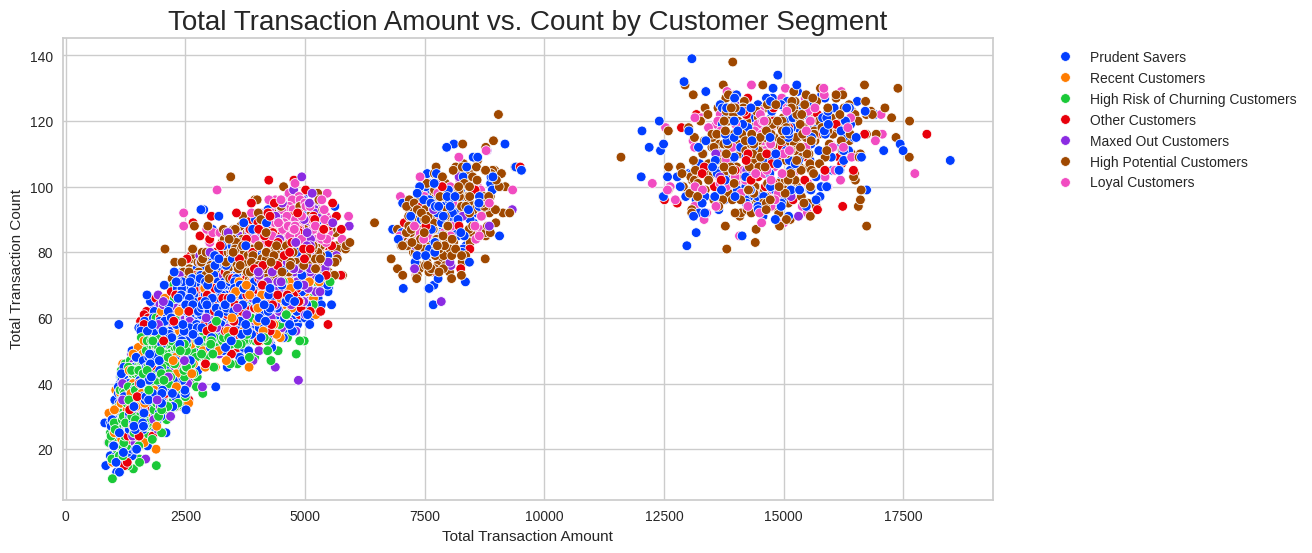

In [105]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Customer_Segment', data=df3, palette='bright')
plt.title('Total Transaction Amount vs. Count by Customer Segment', size=20)
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The scatter plot analyzing the **"Total Transaction Count"** versus **"Total Transaction Amount"** reveals an intriguing pattern about customer spending behaviors. Notably, the upper-right quadrant, characterized by both high spending and a high transaction count, predominantly consists of **Prudent Savers**, **High Potential Customers**, and **Loyal Customers**.

This observation is particularly fascinating for the **Prudent Savers** segment. Although these customers are defined by their high available credit room—suggesting cautious financial behavior—the plot reveals that a subset engages in significant spending, comparable to that of our most active and loyal customer base. This indicates that within the **Prudent Savers**, there exists a group with the potential to be transitioned into **Loyal Customers**, characterized by higher utilization and spending. Recognizing and nurturing this potential can unlock valuable opportunities for increased engagement and loyalty.

# K-means clustering <BR>
 This clustering method is ideal for segmenting a dataset into a predefined number of groups based on feature similarity. It's effective in identifying distinct, non-overlapping clusters and can handle non-linear relationships.

For this, I want to explore the  the following:<BR>
    
*   Param1: How many inactive months
*   Param2: How often a customer makes a purchase
*   Param3: The Amount customers spend on average

For this method, I will explore the sensitivity between minimizing the effect of outliers vs leaving it

In [106]:
# Choose your Parameters for K-Means
param1 = 'Months_Inactive_12_mon'
param2 = 'Total_Trans_Ct'
param3 = 'Total_Trans_Amt'
#param4

#choose the dataset you want to segment into Clusters
df4 = df3.copy()

In [107]:
df_rfm = df4[[param1, param2, param3]] #add more param


## Minimizing the Effect of Outliers

As each selected variables have different range in values, it is always recommended to normalize them before proceeding.

Here are the methods I am considering:



*  Use MinMaxScaler when you know the specific bounds within which you want your features to lie and when you need robustness to very small standard deviations of features and preserving zero entries in sparse data.

*  Use StandardScaler if you need a scaler that is less sensitive to outliers and if your algorithm assumes data is normally distributed. Better if variable acts linearly

*  Use RobustScaler from scikit-learn which scales data according to the percentile range (by default the IQR: Interquartile Range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)). This makes it insensitive to outliers.

For keeping outlier, I'd choose **MinMaxScaler** and for removing outliers, I'd choose **RobustScaler**




In [108]:
#Opt 1 scale the dataset using MinMaxScaler
#sc = MinMaxScaler((0, 1)) # to normalize the features so they are on similar scale
#df_rfm = sc.fit_transform(df_rfm)

In [109]:
#Opt2 Scale the dataset using StandardScaler
#scaler = StandardScaler()
#df_rfm_scaled = scaler.fit_transform(df_rfm)

In [110]:
#Opt 3 Scale the dataset using RobustScaler
robust_scaler = RobustScaler()
df_rfm_scaled = robust_scaler.fit_transform(df_rfm)

## Finding the 'sweet spot' for the number of clusters to categorize our data



### Elbow Method
It plots the Within-Cluster Sum of Square (WCSS), the sum of squared distances of samples to their closest cluster center, against the number of clusters. As the number of clusters increases, WCSS decreases because the clusters are smaller and closer to their centroids.
The **"elbow"** point is when the rate of decrease sharply changes, indicating the optimal number of clusters has been reached.

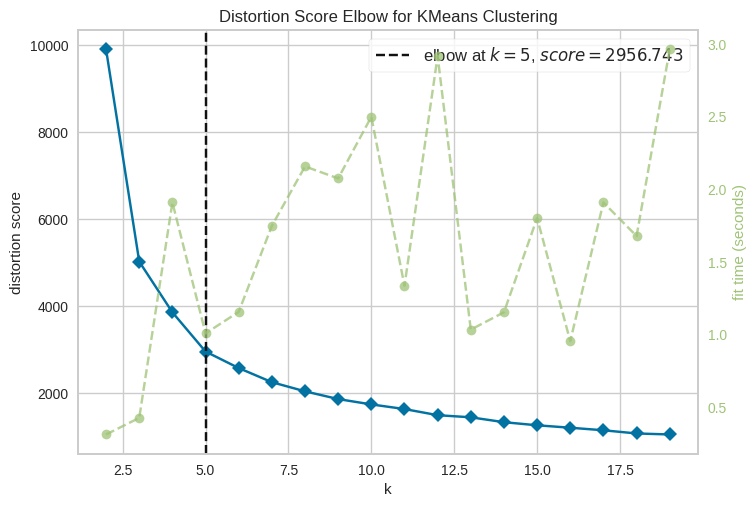

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
#find the optimal number of clusters to use for K-means clustering algorithm
kmeans = KMeans(n_init=10, random_state=42) #creates k-means model, set random_state
visualizer = KElbowVisualizer(kmeans,k=(2, 20)) # test adn plot performance of clustering ranging from 2 to 20
visualizer.fit(df_rfm_scaled)
visualizer.show()

According to above graph, the cluster size should be 5.

### Silhouette scores: measures how similar an object is to its own cluster compared to other clusters.<BR>
It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The optimal number of clusters is taken as the one that maximizes the average silhouette score across all samples. This method provides a more quantitative approach and a clearer metric to evaluate the quality of clustering.

Number of clusters: 2, Silhouette Score: 0.710
Number of clusters: 3, Silhouette Score: 0.498
Number of clusters: 4, Silhouette Score: 0.491
Number of clusters: 5, Silhouette Score: 0.435
Number of clusters: 6, Silhouette Score: 0.396
Number of clusters: 7, Silhouette Score: 0.389
Number of clusters: 8, Silhouette Score: 0.392
Number of clusters: 9, Silhouette Score: 0.378
Number of clusters: 10, Silhouette Score: 0.367


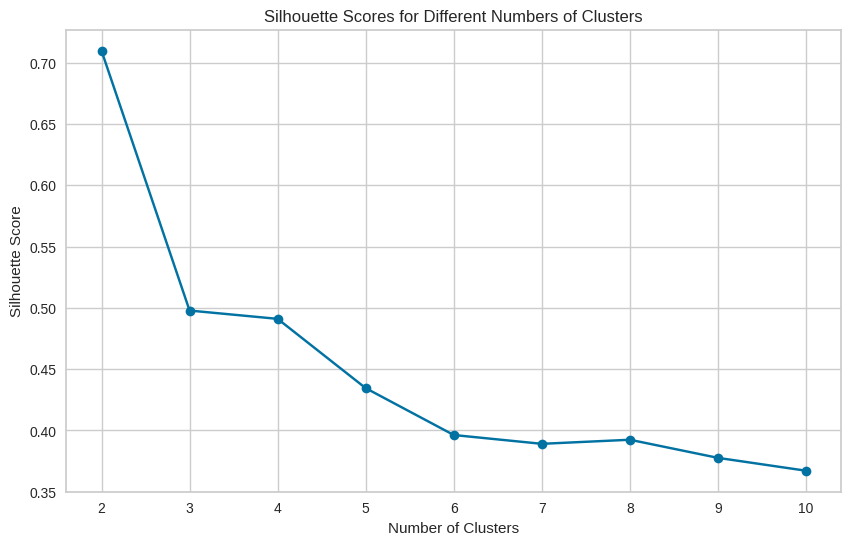

The optimal number of clusters is: 2 with a silhouette score of 0.710


In [112]:
# Range of potential clusters to evaluate
range_n_clusters = list(range(2, 11))  # Example: evaluates from 2 to 10 clusters

silhouette_avg_scores = []

# Loop through each number of clusters, fit the model, and calculate the silhouette score
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_rfm_scaled)
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.3f}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Identifying the optimal number of clusters based on the highest silhouette score
optimal_clusters = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f"The optimal number of clusters is: {optimal_clusters} with a silhouette score of {max(silhouette_avg_scores):.3f}")

**Cluster No. Used:** The silhouette score recommended 2 clusters whereas the elbow method recommended 6 clusters. Since 2 clusters make it impossible to analyze the customers by segment, I decided to go with 7 clusters to see if it can better segment the data.


In [113]:
visualizer.elbow_value_

5

In [114]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(df_rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [115]:
X = df_rfm.copy()
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

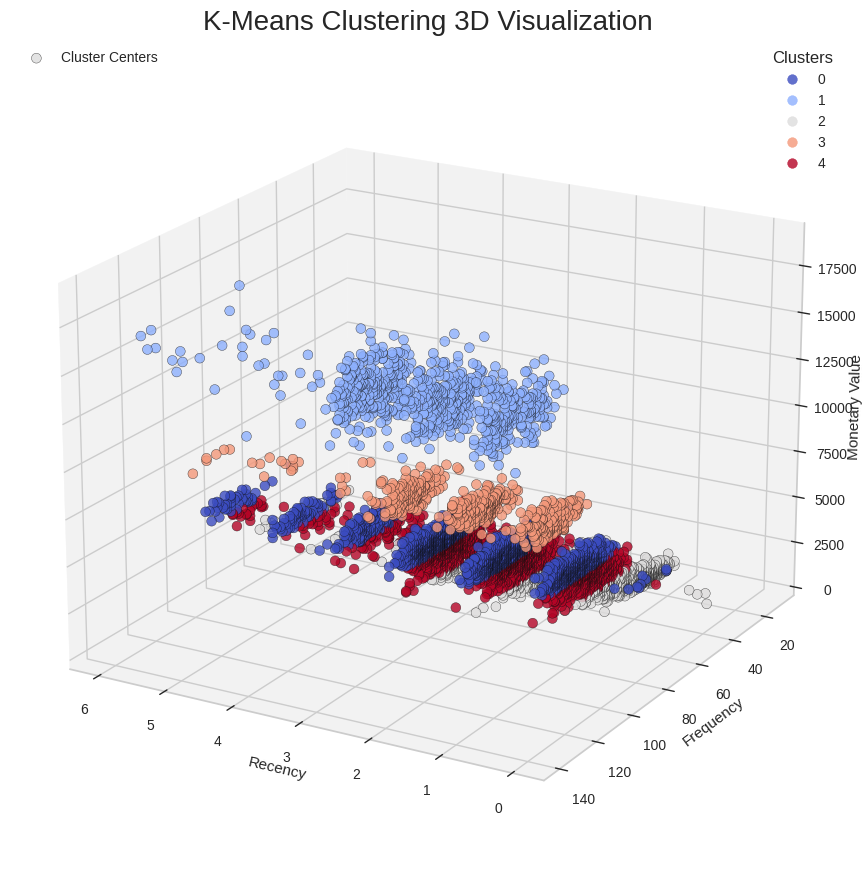

In [116]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot of the data points colored by cluster
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='coolwarm', edgecolor='k', s=50, alpha=0.8, label='Customer Clusters')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='X', color='red', s=200, edgecolor='k', label='Cluster Centers')

# Labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('K-Means Clustering 3D Visualization', size=20)

# Enhancements
ax.grid(True)
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.zaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.view_init(elev=20, azim=120)  # Adjust for best angle

# Legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.legend(['Cluster Centers'], loc='upper left')

plt.tight_layout()
plt.show()


## Results

In [117]:
# Prepare df_rfm with necessary columns and add cluster labels
df_rfm = df4[['CLIENTNUM', param1, param2, param3]] #add param here
df_rfm['KMeansCluster'] = kmeans.labels_ + 1
df_rfm.columns = ['id', 'Param1', 'Param2', 'Param3', 'KMeansCluster'] #add more param here

# Group by KMeansCluster and aggregate with specified functions, including mode and count
grouped_df_rfm = df_rfm.groupby('KMeansCluster').agg({
    'Param1': ['min', 'max', 'median', lambda x: x.mode().iat[0] if not x.mode().empty else np.NaN, 'mean', 'std', 'count'],
    'Param2': ['min', 'max', 'median', lambda x: x.mode().iat[0] if not x.mode().empty else np.NaN, 'mean', 'std'],
    'Param3': ['min', 'max', 'median', lambda x: x.mode().iat[0] if not x.mode().empty else np.NaN, 'mean', 'std']
    #,'Param4': ['min', 'max', 'median', lambda x: x.mode().iat[0] if not x.mode().empty else np.NaN, 'mean', 'std']
}).rename(columns={'<lambda_0>': 'mode'})

# Convert all numeric values to integers (round and then to int) for no decimal places, except for 'count' which is already an integer
grouped_df_rfm = grouped_df_rfm.applymap(lambda x: np.round(x).astype(int) if pd.notnull(x) and not isinstance(x, str) else x)

grouped_df_rfm


<ipython-input-117-94ec7565c7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['KMeansCluster'] = kmeans.labels_ + 1


Param1                                Param2                   \
                 min max median mode mean std count    min  max median mode   
KMeansCluster                                                                 
1                  0   6      2    3    2   1  3063     41  103     78   81   
2                  1   6      2    3    2   1   747     81  139    111  116   
3                  0   6      2    3    2   1  2387     11   92     39   33   
4                  1   6      2    2    2   1   478     64  122     89   88   
5                  0   6      2    3    2   1  1825     37  103     68   69   

                       Param3                                    
              mean std    min    max median   mode   mean   std  
KMeansCluster                                                    
1               77   9   4088   5938   4564   4253   4606   336  
2              110  11  11603  18484  14662  13988  14698  1064  
3               41  12    816   2655   1686   1468   1747   422  
4               90   9   6453   9523   7854   7685   7935   538  
5               68   9   2657   4087   3653   4037   3568   395

### Summary
 **- Cluster 2 - Best Customers:** Stands out as the high spending group with a high frequency of transactions and varying moderately recent inactivity (avg 2 inactive months). This cluster is the High Value customers we want to retain.<BR>

**>Recommended Strategy:** Focus on retention and engagement strategies such as personalized loyalty rewards and VIP experiences. Conduct deep dives into their purchase patterns to create personalized offers and communications that resonate with their preferences and behaviors. Consider feedback mechanisms to gather insights for continuous improvement.<BR>   
    
**- Cluster 4 - High Potential Customers:** Shows moderate to high activity and average spending around $4.5K. This group has the potential to grow as they are active and spending moderately. <BR>
**>Recommended Strategy:**Develop a tiered loyalty program that rewards increased spending and engagement, with tiers unlocking exclusive benefits. Use data analytics to understand their preferences and tailor communications and offers. Encourage product reviews and referrals to deepen engagement and leverage word-of-mouth.
    
**- Cluster 1 & 5- Prudent Spenders:** Shows long period of inactivity (6 months) and low to moderate spening average as well as transactions. This group seems to be more prudence in spending.  <BR>
**>Recommended Strategy:** Initiate seasonal campaigns focusing on engagement through personalized communications that acknowledge their inactivity. Offer them a “We Miss You” discount or an exclusive preview of new products/services tailored to their past purchasing history. Utilize surveys to understand their inactivity reasons and address concerns.
    
**- Cluster 3 - Lost Customers:** Accompanied with long period of inactivity, this group has the lowest avg transaction count and low spending amount (around $1K) and transactions. Potentially indicating weaker spending power. However, it represents approximately 28% of the sample dataset so it may be worth looking into if there are resources available.<BR>
**>Recommended Strategy:** Conduct exit interviews or surveys to understand their reasons for low spending and inactivity. For those with potential for re-engagement, offer a highly personalized comeback offer that addresses their feedback. Analyze this group's data to identify any service or product gaps that can be improved for current and future customers. However, prioritize resources efficiently, focusing more on customers with higher potential value.
<BR>    


# Takeaway

RFM analysis and K-means clustering both provide a in-depth customer segmentation with the following main differences.

### RFM Analysis                 
----        
* Evaluates each individual with easy to understand 4 point scoring system
* Easy to calculate and understand
* Outliers have smaller effect as the range of numbers are evenly divided to 4 bins
* You have control over which RFM combos belong to the same cluster/group, which can be good or bad (Bias)

### K-Means Clustering                   
----         
* Easy to implement this unsupervised machine learning algorithm using **sklearn**
* Easy to scale and can test more than 3 variables for clustering
* Because the outcome is statistical based, any outliers in the dataset may skew the data
* Depending on the # of clusters you select to use, it may change the finding significantly
* As it randomly selects a specified # of datapoints as cluster centers, every run yields to slightly different cluster group unless you set random_state parameter and scale your dataset properly

